In [1]:
# import libraries
"""
Numpy and Pandas for data manipulation
Matplotlib and Seaborn for visualization
Scikit-learn for simple machine learning
"""
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/wangxinjie/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# use a standard dataset of heterogenous data
#data = pd.read_csv('Crimes_-_2001_to_present.csv')
data = pd.read_csv('https://drive.google.com/file/d/0B_S8AD2ME176ZjFGb3MydTBVQkk/view?usp=sharing')

# 1 Data Preprocessing
Start by loading and wrangling your dataset. 
That includes dealing with missing values and formatting your dataset for later use.

In [3]:
#crimes = data[(data.Year>2009)&(data.Year<2016)] # 2010~2015
crimes = data # 2010~2015
crimes.head(5)

,﻿ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10365064,HZ100370,12/31/2015 11:59:00 PM,075XX S EMERALD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,17,68,14,1172605,1854931,2015,01/07/2016 04:14:34 PM,41.757367,-87.642993,"(41.757366519, -87.642992854)"
1,10364662,HZ100006,12/31/2015 11:55:00 PM,079XX S STONY ISLAND AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,...,8,45,04B,1188223,1852840,2015,01/07/2016 04:14:34 PM,41.751270,-87.585822,"(41.751270452, -87.585822373)"
2,10364683,HZ100002,12/31/2015 11:50:00 PM,037XX N CLARK ST,0460,BATTERY,SIMPLE,SIDEWALK,True,False,...,44,6,08B,1167786,1925033,2015,01/07/2016 04:14:34 PM,41.949837,-87.658635,"(41.949837364, -87.658635101)"
3,10364740,HZ100010,12/31/2015 11:50:00 PM,024XX W FARGO AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,50,2,06,1158878,1949369,2015,01/07/2016 04:14:34 PM,42.016804,-87.690709,"(42.016804165, -87.690708662)"
4,10366580,HZ102701,12/31/2015 11:45:00 PM,050XX W CONCORD PL,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,37,25,14,1142595,1910502,2015,01/07/2016 04:14:34 PM,41.910470,-87.751597,"(41.910469677, -87.751597381)"


In [4]:
# list all columns
crimes.columns

Index(['﻿ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [5]:
crimes.columns = ['ID', 'Case_Number', 'Date', 'Block', 'IUCR', 'Primary_Type',
       'Description', 'Location_Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community_Area', 'FBI_Code', 'X_Coordinate',
       'Y_Coordinate', 'Year', 'Updated_On', 'Latitude', 'Longitude',
       'Location'] # Rename columes

In [6]:
crimes.describe()

,ID,Arrest,Domestic,Beat,District,Ward,Community_Area,X_Coordinate,Y_Coordinate,Year,Latitude,Longitude
count,1895849.000000,1895849,1895849,1895849.000000,1895846.000000,1895803.000000,1895379.000000,1881274.000000,1881274.000000,1895849.000000,1881274.000000,1881274.000000
mean,8792802.706816,0.273289,0.145768,1172.504276,11.301682,22.779060,37.716319,1164443.429271,1885384.070388,2012.284124,41.841093,-87.672090
std,939152.730236,0.445648,0.352874,697.998148,6.923953,13.751678,21.520041,16376.247464,31433.889149,1.688967,0.086454,0.059598
min,19237.000000,False,False,111.000000,1.000000,1.000000,0.000000,1092711.000000,1813897.000000,2010.000000,41.644590,-87.934325
25%,8044640.000000,0,0,621.000000,6.000000,10.000000,23.000000,1152602.000000,1858633.000000,2011.000000,41.767448,-87.715079
50%,8785710.000000,0,0,1031.000000,10.000000,22.000000,32.000000,1165876.000000,1890527.000000,2012.000000,41.855289,-87.666558
75%,9560605.000000,1,0,1722.000000,17.000000,34.000000,58.000000,1176352.000000,1908999.000000,2014.000000,41.906067,-87.628344
max,10382355.000000,True,True,2535.000000,31.000000,50.000000,77.000000,1205111.000000,1951601.000000,2015.000000,42.022787,-87.524615


## 1-1 Assign a primary key

In [7]:
# we want to use the ID as the "primary key" of a row
crimes.index = crimes.pop('ID')

## 1-2 Dealing with missing data

In [8]:
crimes.isnull().sum()

Case_Number                 1
Date                        0
Block                       0
IUCR                        0
Primary_Type                0
Description                 0
Location_Description      923
Arrest                      0
Domestic                    0
Beat                        0
District                    3
Ward                       46
Community_Area            470
FBI_Code                    0
X_Coordinate            14575
Y_Coordinate            14575
Year                        0
Updated_On                  2
Latitude                14575
Longitude               14575
Location                14575
dtype: int64

In [9]:
print (470/1895578) # Ward
print (14515/1895578) # Coordinate, Location, etc.

0.0002479454815365023
0.007657295030856024


### 1-2-1 drop the rows with na values

In [10]:
print(crimes.shape)

(1895849, 21)


In [11]:
#drop rows with na values
crimes = crimes.dropna()
print(crimes.shape)

(1879925, 21)


In [12]:
crimes.isnull().sum()

Case_Number             0
Date                    0
Block                   0
IUCR                    0
Primary_Type            0
Description             0
Location_Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community_Area          0
FBI_Code                0
X_Coordinate            0
Y_Coordinate            0
Year                    0
Updated_On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

## 1-3 Formatting data
### 1-3-1 Convert data type from object to datetime

In [13]:
convert_datetime = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')

In [14]:
year = convert_datetime.dt.year
month = convert_datetime.dt.month
day = convert_datetime.dt.day
weekday =  convert_datetime.dt.weekday
hour = convert_datetime.dt.hour
time = convert_datetime.dt.time

#### Join datetime data

In [15]:
frames_YMDWT = [year, month, day, weekday, hour, time]
join_YMDWT = pd.concat(frames_YMDWT, axis=1, join='inner')
join_YMDWT.columns = ['year','month','day','weekday','hour','time'] # Rename columes
New_Crimes = pd.concat([crimes,join_YMDWT], axis=1, join='inner') # Join the new time-formated data with old data
New_Crimes.drop('Date',inplace=True,axis=1) # Drop original date of the old data, since we won't use it anymore.

In [16]:
New_Crimes # Display result

,Case_Number,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,District,...,Updated_On,Latitude,Longitude,Location,year,month,day,weekday,hour,time
ID,,,,,,,,,,,,,,,,,,,,,
10365064,HZ100370,075XX S EMERALD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,621,6,...,01/07/2016 04:14:34 PM,41.757367,-87.642993,"(41.757366519, -87.642992854)",2015,12,31,3,23,23:59:00
10364662,HZ100006,079XX S STONY ISLAND AVE,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,411,4,...,01/07/2016 04:14:34 PM,41.751270,-87.585822,"(41.751270452, -87.585822373)",2015,12,31,3,23,23:55:00
10364683,HZ100002,037XX N CLARK ST,0460,BATTERY,SIMPLE,SIDEWALK,True,False,1923,19,...,01/07/2016 04:14:34 PM,41.949837,-87.658635,"(41.949837364, -87.658635101)",2015,12,31,3,23,23:50:00
10364740,HZ100010,024XX W FARGO AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,2411,24,...,01/07/2016 04:14:34 PM,42.016804,-87.690709,"(42.016804165, -87.690708662)",2015,12,31,3,23,23:50:00
10366580,HZ102701,050XX W CONCORD PL,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,2533,25,...,01/07/2016 04:14:34 PM,41.910470,-87.751597,"(41.910469677, -87.751597381)",2015,12,31,3,23,23:45:00
10365005,HZ100487,001XX E WACKER DR,0820,THEFT,$500 AND UNDER,STREET,False,False,114,1,...,01/07/2016 04:14:34 PM,41.888165,-87.622937,"(41.888165132, -87.622937212)",2015,12,31,3,23,23:45:00
10365142,HZ100722,001XX E WACKER DR,0880,THEFT,PURSE-SNATCHING,SIDEWALK,False,False,114,1,...,01/07/2016 04:14:34 PM,41.888165,-87.622937,"(41.888165132, -87.622937212)",2015,12,31,3,23,23:45:00
10364809,HZ100034,004XX E RANDOLPH ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,APARTMENT,False,True,114,1,...,01/07/2016 04:14:34 PM,41.884547,-87.616947,"(41.884546689, -87.616947314)",2015,12,31,3,23,23:42:00
10364668,HY556628,048XX S JUSTINE ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,APARTMENT,True,True,933,9,...,01/07/2016 04:14:34 PM,41.805879,-87.663680,"(41.805879049, -87.663679798)",2015,12,31,3,23,23:41:00


# 2 Descriptive statistics

## 2-1 Datetime
### 2-1-1 Count case frequency of datetime

In [17]:
count_year = New_Crimes.groupby('year').agg({ 'Case_Number': 'count'})
count_month = New_Crimes.groupby('month').agg({ 'Case_Number': 'count'})
count_weekday = New_Crimes.groupby('weekday').agg({ 'Case_Number': 'count'})
count_hour = New_Crimes.groupby('hour').agg({ 'Case_Number': 'count'})

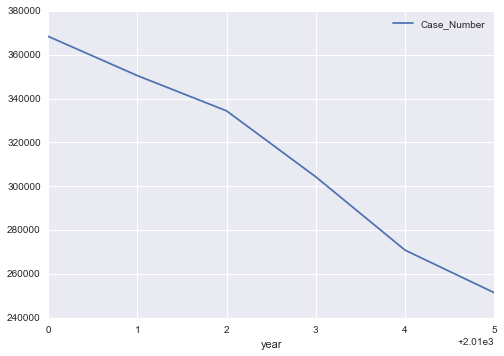

In [18]:
count_year.plot()

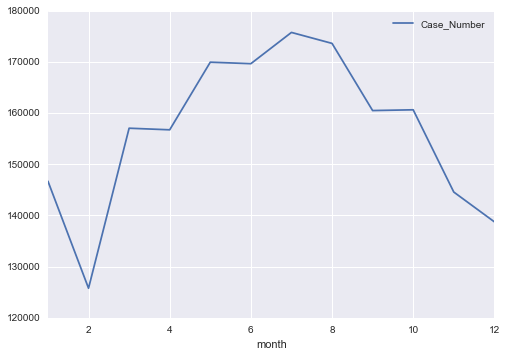

In [19]:
count_month.plot()

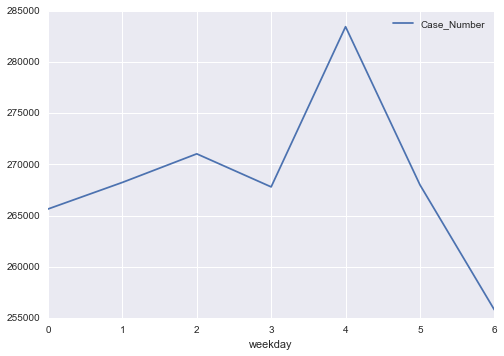

In [20]:
count_weekday.plot()

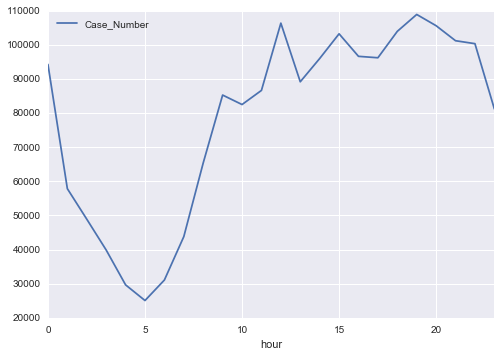

In [21]:
count_hour.plot()

### 2-1-2 Count "Primary Type" of datetime

In [22]:
count_type = New_Crimes.groupby('Primary_Type').agg({ 'Case_Number': 'count'})
count_type = count_type.sort_values('Case_Number', ascending=False)
count_type.columns = ['Case_count'] # Rename columes

In [23]:
count_type[:10]

,Case_count
Primary_Type,
THEFT,413536
BATTERY,335152
NARCOTICS,201309
CRIMINAL DAMAGE,200033
BURGLARY,120646
ASSAULT,113066
OTHER OFFENSE,111002
MOTOR VEHICLE THEFT,87070
DECEPTIVE PRACTICE,76832


In [24]:
top5_type = New_Crimes[New_Crimes.Primary_Type.isin(['THEFT','BATTERY','NARCOTICS','CRIMINAL DAMAGE','BURGLARY'])]

# top5_type_year = top4_type.groupby(['year','Primary_Type']).agg({ 'Case_Number': 'count'})
# top5_type_month = top4_type.groupby(['month','Primary_Type']).agg({ 'Case_Number': 'count'})
# top5_type_weekday = top4_type.groupby(['weekday','Primary_Type']).agg({ 'Case_Number': 'count'})
# top5_type_hour = top4_type.groupby(['hour','Primary_Type']).agg({ 'Case_Number': 'count'})

/Users/wangxinjie/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


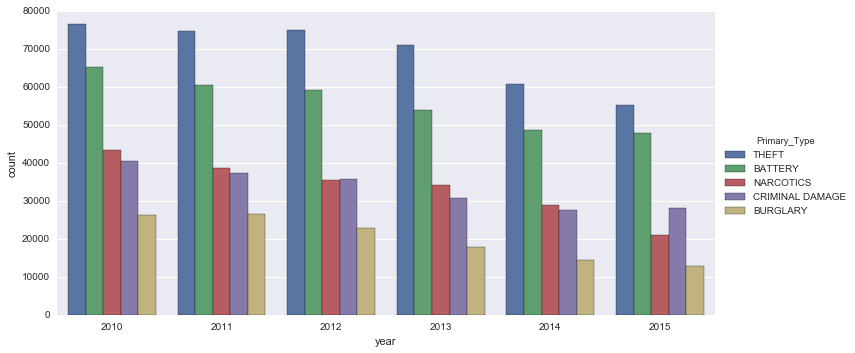

In [25]:
sns.factorplot("year", data=top5_type, hue="Primary_Type",size=5,aspect=2, 
               kind='count', order=range(2010, 2016), hue_order=['THEFT','BATTERY','NARCOTICS','CRIMINAL DAMAGE','BURGLARY'])

/Users/wangxinjie/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


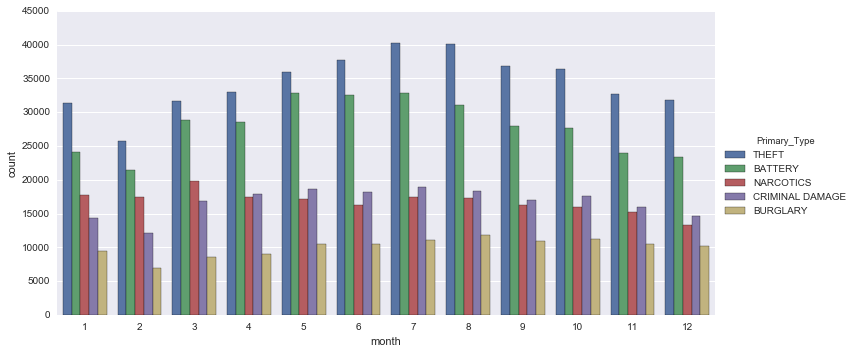

In [26]:
sns.factorplot("month", data=top5_type, hue="Primary_Type",size=5,aspect=2, 
               kind='count', order=range(1, 13), hue_order=['THEFT','BATTERY','NARCOTICS','CRIMINAL DAMAGE','BURGLARY'])

/Users/wangxinjie/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


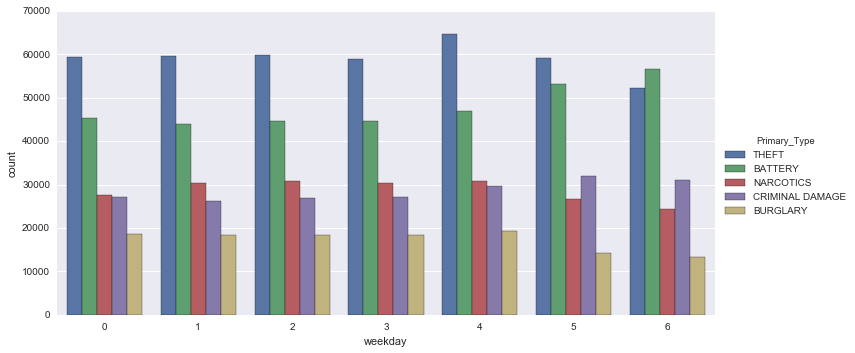

In [27]:
sns.factorplot("weekday", data=top5_type, hue="Primary_Type",size=5,aspect=2, 
               kind='count', order=range(0,7), hue_order=['THEFT','BATTERY','NARCOTICS','CRIMINAL DAMAGE','BURGLARY'])

### 2-1-2 Simplify Primary Types
#### Find main Primary Types

In [28]:
grouped = New_Crimes.groupby('Primary_Type') # Group by Primary types
CountPrimaryType = grouped.agg({'Case_Number': 'count'}) 
PrimaryTypeRate = []
for row in CountPrimaryType['Case_Number']:
    PrimaryTypeRate.append(row/1879946) # Calculate rates
CountPrimaryType['Rate'] = PrimaryTypeRate # Put rates into frame 'CountPrimaryType'
CountPrimaryType.sort_values('Case_Number', ascending = False)

,Case_Number,Rate
Primary_Type,,
THEFT,413536,0.219972
BATTERY,335152,0.178277
NARCOTICS,201309,0.107082
CRIMINAL DAMAGE,200033,0.106404
BURGLARY,120646,0.064175
ASSAULT,113066,0.060143
OTHER OFFENSE,111002,0.059045
MOTOR VEHICLE THEFT,87070,0.046315
DECEPTIVE PRACTICE,76832,0.040869


## 2-2 Deepening to each community area
### Overview

Cases happened in wards by hours

In [29]:
WardGroupedHR = New_Crimes.groupby(['Ward', 'hour'])
WcountCaseByHR = WardGroupedHR.agg({ 'Case_Number': 'count'}).sort_values('Case_Number', ascending = False)
WcountCaseByHR

Case_Number
Ward hour             
28   19           6198
42   17           5513
28   20           5458
     11           5257
     12           5255
     18           5191
42   16           5153
     14           5151
     18           5080
     15           5030
     12           5014
24   19           4898
42   13           4882
28   21           4873
     22           4824
2    12           4782
28   15           4770
42   19           4700
28   16           4628
     10           4614
24   20           4566
28   17           4493
     14           4478
     13           4425
24   18           4340
     12           4312
     21           4259
27   19           4229
2    14           4108
     15           4096
...                ...
45   6             316
43   6             310
38   4             309
47   6             307
45   4             307
40   6             305
49   5             304
36   4             303
39   6             298
40   4             295
46   5             293
50   4             289
48   6             285
39   5             282
33   6             281
43   5             278
50   6             274
48   4             271
33   5             262
45   5             260
38   5             259
36   5             248
47   4             248
19   6             248
50   5             245
48   5             231
40   5             226
47   5             224
19   4             223
     5             213

[1200 rows x 1 columns]

In [30]:
WardGrouped = New_Crimes.groupby(['Ward', 'Primary_Type'])
WcountCaseByPT = WardGrouped.agg({ 'Case_Number': 'count'})
WcountCaseByPT

Case_Number
Ward Primary_Type                                  
1    ARSON                                       52
     ASSAULT                                   1483
     BATTERY                                   4460
     BURGLARY                                  2783
     CRIM SEXUAL ASSAULT                        102
     CRIMINAL DAMAGE                           4100
     CRIMINAL TRESPASS                          699
     DECEPTIVE PRACTICE                        1545
     GAMBLING                                     5
     HOMICIDE                                    20
     INTERFERENCE WITH PUBLIC OFFICER            47
     INTIMIDATION                                11
     KIDNAPPING                                  13
     LIQUOR LAW VIOLATION                       120
     MOTOR VEHICLE THEFT                       1985
     NARCOTICS                                 1146
     NON - CRIMINAL                               1
     NON-CRIMINAL                                 1
     OBSCENITY                                    2
     OFFENSE INVOLVING CHILDREN                 116
     OTHER NARCOTIC VIOLATION                     1
     OTHER OFFENSE                             1246
     PROSTITUTION                                61
     PUBLIC PEACE VIOLATION                     145
     ROBBERY                                   1275
     SEX OFFENSE                                118
     STALKING                                    24
     THEFT                                    12629
     WEAPONS VIOLATION                          131
2    ARSON                                       41
...                                             ...
49   THEFT                                     5498
     WEAPONS VIOLATION                          274
50   ARSON                                       24
     ASSAULT                                   1009
     BATTERY                                   3057
     BURGLARY                                  1710
     CONCEALED CARRY LICENSE VIOLATION            1
     CRIM SEXUAL ASSAULT                         73
     CRIMINAL DAMAGE                           2727
     CRIMINAL TRESPASS                          404
     DECEPTIVE PRACTICE                         825
     GAMBLING                                     4
     HOMICIDE                                    13
     INTERFERENCE WITH PUBLIC OFFICER            68
     INTIMIDATION                                 8
     KIDNAPPING                                  10
     LIQUOR LAW VIOLATION                        37
     MOTOR VEHICLE THEFT                        864
     NARCOTICS                                 1062
     OBSCENITY                                    5
     OFFENSE INVOLVING CHILDREN                 149
     OTHER OFFENSE                             1239
     PROSTITUTION                                28
     PUBLIC INDECENCY                             1
     PUBLIC PEACE VIOLATION                     118
     ROBBERY                                    665
     SEX OFFENSE                                 60
     STALKING                                    11
     THEFT                                     4826
     WEAPONS VIOLATION                          131

[1424 rows x 1 columns]

### 2-2-1 Group Community Areas and save dataframes into a list

In [31]:
WardGrouped = New_Crimes.groupby(['Ward'])
groupListPT = []
groupListHR = []
for i in range(0,50):
    groupListPT.append(WardGrouped.get_group(i+1)) # append sub dataframe into list
    # group the sub dataframe by Primary type
    groupListPT[i] = groupListPT[i].groupby(['Primary_Type']).agg({'Case_Number':'count'})
    groupListPT[i] = groupListPT[i].sort_values('Case_Number', ascending = False) #sort
    
    groupListHR.append(WardGrouped.get_group(i+1)) # append sub dataframe into list
    # group the sub dataframe by hour
    groupListHR[i] = groupListHR[i].groupby(['hour']).agg({'Case_Number':'count'})

### 2-2-2 Interactive search
By Primary Type of a ward

In [32]:
from IPython.html.widgets import interact, interact_manual

@interact_manual(text='1')
def react(text):
    groupListPT[int(text)-1].plot(kind = 'bar') #create a bar chart

/Users/wangxinjie/anaconda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


By hours of a ward

In [33]:
@interact_manual(text='1')
def react(text):
    groupListHR[int(text)-1].plot() #create a plot

## 2-3 **Others Plotting for primary type **

In [34]:
crime_primary = crimes.groupby(['Primary_Type','Arrest'])['Location_Description'].count()
#primary = crime({'Primary Type':['THEFT','BATTERY','NARCOTICS','CRIMINAL DAMAGE','BURGLARY']})
#crime_primary = crime_primary.isin(primary)
crime_primary = crime_primary.unstack()
crime_primary =crime_primary.sort(columns=[0,1])
crime_primary

/Users/wangxinjie/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Arrest,False,True
Primary_Type,,
NON-CRIMINAL (SUBJECT SPECIFIED),2,1
GAMBLING,7,3677
CONCEALED CARRY LICENSE VIOLATION,11,38
HUMAN TRAFFICKING,12,1
OTHER NARCOTIC VIOLATION,14,23
NON - CRIMINAL,29,4
NON-CRIMINAL,32,4
OBSCENITY,37,156
PROSTITUTION,44,11646


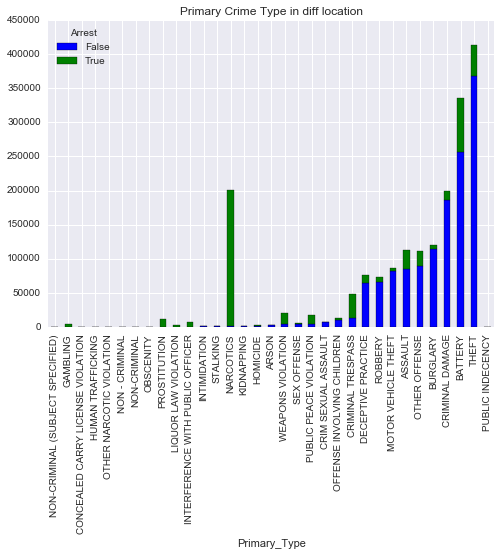

In [35]:
plt.figure()
crime_primary.plot(kind='bar',stacked=True,title="Primary Crime Type in diff location")

In [36]:
crime_PD = pd.DataFrame(crimes)
crime_PD = crime_PD[crime_PD.Arrest != True]
#crime_PD = crime_PD.drop(['Block', 'IUCR','Description','Beat','District', 'Community_Area','FBI_Code', 'X_Coordinate','Y_Coordinate', 'Updated_On', 'Latitude', 'Longitude','Location'],axis=1) #,'Year','time'
crime_PD = crime_PD.groupby(['Year','Arrest','Primary_Type'])['Case_Number'].count().unstack()
crime_PD

,Primary_Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Year,Arrest,,,,,,,,,,,,,,,,,,,,,
2010,False,455,16427,50942,24935,NaN,1087,37860,2891,10024,NaN,...,1972,4,18670,5,1006,12869,766,162,68665,792
2011,False,456,15210,46297,25332,NaN,1220,34716,2241,9639,NaN,...,1822,2,16993,5,696,12654,705,151,66384,732
2012,False,423,15101,46067,21562,NaN,1164,33386,2160,9883,1,...,1724,2,14703,15,756,12099,724,169,66813,638
2013,False,318,13472,40967,16745,NaN,985,28685,2057,9847,5,...,1820,1,14457,4,804,10460,670,117,63419,582
2014,False,359,12195,36271,13473,9,1089,25412,2014,13021,1,...,1812,2,12699,13,543,8624,665,107,53396,534
2015,False,397,12722,36543,12198,2,1067,26325,1967,11851,NaN,...,1686,3,12138,2,527,8677,605,112,48723,719


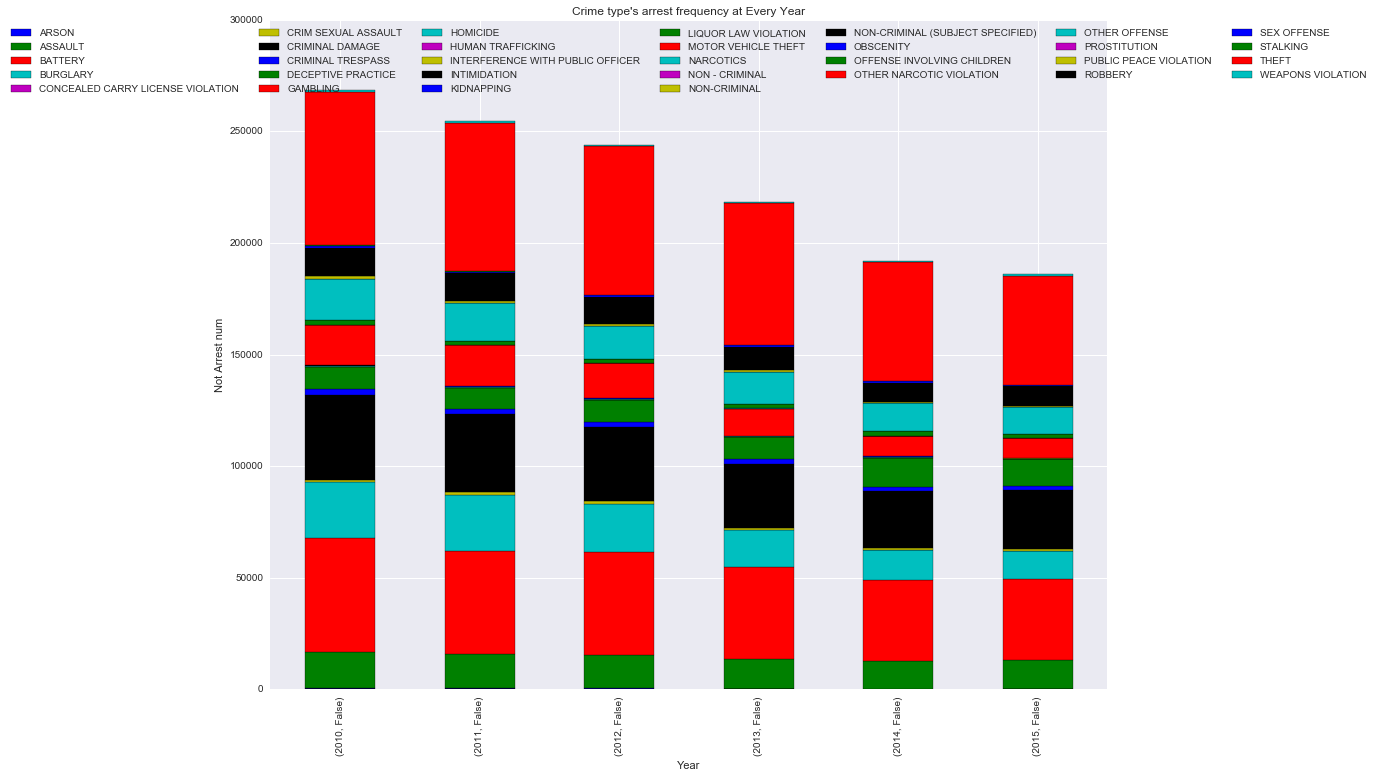

In [37]:
my_plot = crime_PD.plot(kind='bar',stacked=True,title="Crime type's arrest frequency at Every Year",figsize=(15, 12))
my_plot.set_xlabel("Year")
my_plot.set_ylabel("Not Arrest num")
my_plot.legend(loc=9,ncol=7)

In [38]:
crime_PD_T = pd.DataFrame(crimes)
crime_PD_T = crime_PD_T[crime_PD_T.Arrest == True]
crime_PD_T = crime_PD_T.groupby(['Year','Arrest','Primary_Type'])['Case_Number'].count().unstack()
crime_PD_T

,Primary_Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,GAMBLING,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Year,Arrest,,,,,,,,,,,,,,,,,,,,,
2010,True,66,5027,14219,1373,NaN,222,2632,6488,2071,926,...,2,3254,2480,7,2519,1353,327,26,7788,2898
2011,True,48,5181,14126,1260,NaN,209,2583,6410,2462,736,...,3,3163,2419,13,2398,1319,343,30,8445,3144
2012,True,46,4789,13055,1273,NaN,187,2462,6053,2953,723,...,4,2751,2188,17,2250,1381,283,38,8240,3259
2013,True,46,4455,12906,1081,NaN,189,2102,6073,2486,591,...,4,3390,1647,10,2330,1326,276,30,7713,2660
2014,True,31,4484,12444,851,6,153,2067,5485,1734,392,...,8,4118,1605,10,2345,1025,237,26,7335,2574
2015,True,43,4003,11315,563,32,95,1803,4377,861,309,...,2,4666,1307,14,1866,783,184,25,6615,2605


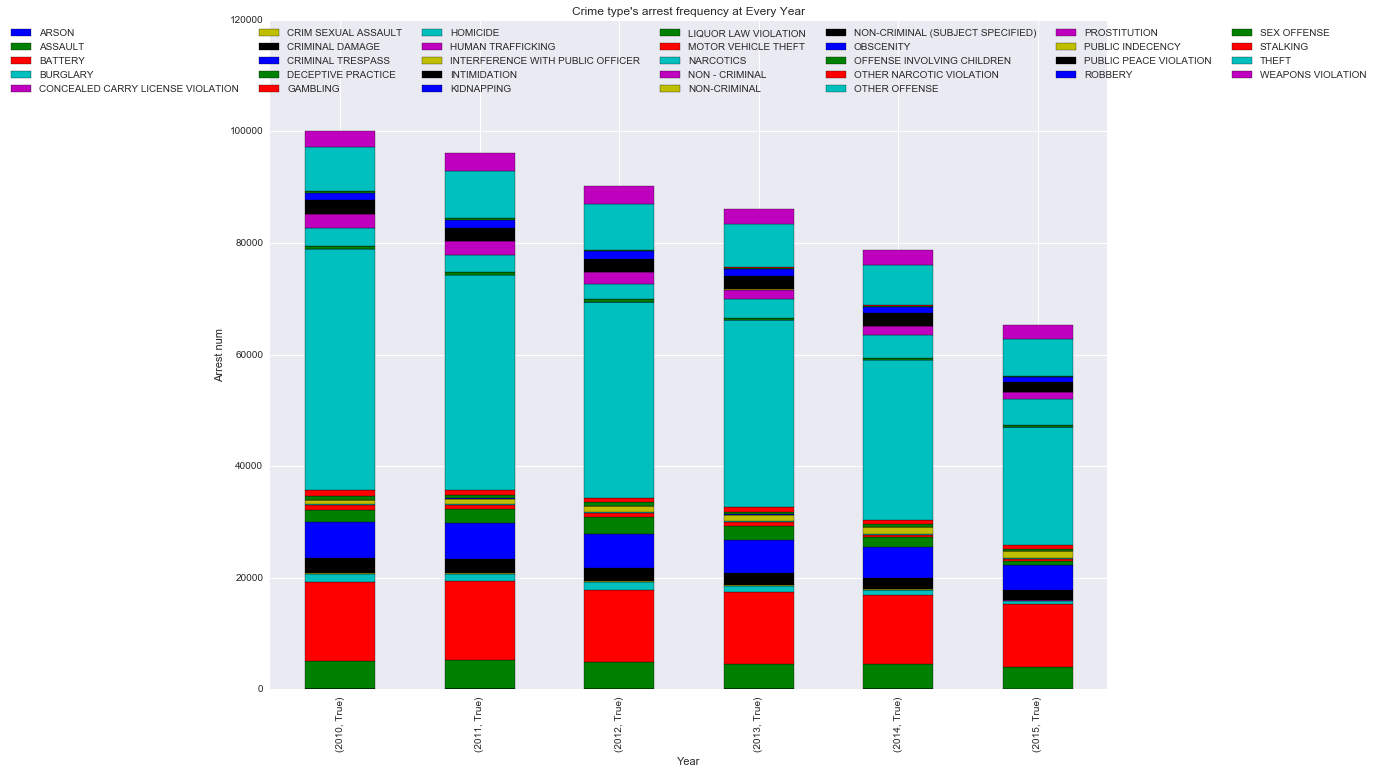

In [39]:
my_plot_T = crime_PD_T.plot(kind='bar',stacked=True,title="Crime type's arrest frequency at Every Year",figsize=(15, 12))
my_plot_T.set_xlabel("Year")
my_plot_T.set_ylabel("Arrest num")
my_plot_T.legend(loc=9,ncol=7)

# 3 Correlations between attributes

# 4 Cluster similar items